In [1]:
import os
import sys
import time
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from seaborn import heatmap
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline as pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE






ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.6/259.6 MB 1.3 MB/s eta 0:00:0000:0100:04m 169.6/259.6 MB 1.1 MB/s eta 0:01:21
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 894.6 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 1.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 1.4 MB/s eta 0:00:0000:0100:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 2.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 1.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.8/389.8 kB 387.2 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 822.6 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/5.5 MB 870.4 kB/s eta 0:00:04

In [46]:
df = pd.read_csv('prlmis-data-full.csv')
df.head()

,YEAR,AGECAT,SEX,MARRIED,EDUCAT,EMPLOY18,CTYMETRO,HEALTH,MENTHLTH,PRLMISEVR,...,PRLANY,HEROINEVR,HEROINUSE,TRQLZRS,SEDATVS,COCAINE,AMPHETMN,HALUCNG,TRTMENT,MHTRTMT
0,15,3,1,0,2,2,0,3,4,1,...,10,1,5,5,0,5,2,2,6,0
1,15,3,0,0,3,1,0,6,7,1,...,10,1,5,5,0,4,3,5,5,0
2,15,2,0,0,3,0,0,4,2,1,...,9,1,5,5,0,4,2,3,7,2
3,15,1,0,0,1,0,0,5,0,1,...,9,1,5,5,0,3,2,2,0,0
4,15,5,0,0,3,0,0,5,2,1,...,9,1,5,5,3,2,2,2,7,0


In [47]:
df.describe()

,YEAR,AGECAT,SEX,MARRIED,EDUCAT,EMPLOY18,CTYMETRO,HEALTH,MENTHLTH,PRLMISEVR,...,PRLANY,HEROINEVR,HEROINUSE,TRQLZRS,SEDATVS,COCAINE,AMPHETMN,HALUCNG,TRTMENT,MHTRTMT
count,170317.000000,170317.000000,170317.000000,170317.000000,170317.000000,170317.000000,170317.000000,170317.000000,170317.000000,170317.000000,...,170317.000000,170317.000000,170317.000000,170317.000000,170317.000000,170317.000000,170317.000000,170317.000000,170317.000000,170317.000000
mean,15.994892,2.772078,0.524927,1.286448,3.063623,0.901419,1.493726,2.330020,0.950698,0.107077,...,0.378893,0.020157,0.031389,0.223988,0.051304,0.179459,0.153825,0.327947,0.061133,0.208828
std,0.816042,1.409875,0.499380,1.517425,1.457736,0.933172,1.231702,1.054522,1.903671,0.309212,...,0.795211,0.140536,0.266169,0.719446,0.325596,0.561877,0.500246,0.869154,0.543367,0.652826
min,15.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16.000000,3.000000,1.000000,1.000000,3.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,17.000000,4.000000,1.000000,2.000000,4.000000,2.000000,3.000000,3.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,17.000000,5.000000,1.000000,4.000000,5.000000,2.000000,3.000000,7.000000,10.000000,1.000000,...,10.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,8.000000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170317 entries, 0 to 170316
Data columns (total 21 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   YEAR       170317 non-null  int64
 1   AGECAT     170317 non-null  int64
 2   SEX        170317 non-null  int64
 3   MARRIED    170317 non-null  int64
 4   EDUCAT     170317 non-null  int64
 5   EMPLOY18   170317 non-null  int64
 6   CTYMETRO   170317 non-null  int64
 7   HEALTH     170317 non-null  int64
 8   MENTHLTH   170317 non-null  int64
 9   PRLMISEVR  170317 non-null  int64
 10  PRLMISAB   170317 non-null  int64
 11  PRLANY     170317 non-null  int64
 12  HEROINEVR  170317 non-null  int64
 13  HEROINUSE  170317 non-null  int64
 14  TRQLZRS    170317 non-null  int64
 15  SEDATVS    170317 non-null  int64
 16  COCAINE    170317 non-null  int64
 17  AMPHETMN   170317 non-null  int64
 18  HALUCNG    170317 non-null  int64
 19  TRTMENT    170317 non-null  int64
 20  MHTRTMT    170317 non-null

In [49]:
df.isna().sum()


,0
YEAR,0
AGECAT,0
SEX,0
MARRIED,0
EDUCAT,0
EMPLOY18,0
CTYMETRO,0
HEALTH,0
MENTHLTH,0
PRLMISEVR,0


In [50]:
df.columns = df.columns.str.lower()

In [51]:
df.columns

Index(['year', 'agecat', 'sex', 'married', 'educat', 'employ18', 'ctymetro',
       'health', 'menthlth', 'prlmisevr', 'prlmisab', 'prlany', 'heroinevr',
       'heroinuse', 'trqlzrs', 'sedatvs', 'cocaine', 'amphetmn', 'halucng',
       'trtment', 'mhtrtmt'],
      dtype='object')

In [52]:
df.drop(columns=['prlany', 'prlmisab'], inplace=True)

In [53]:
# Between health and mental health
df['health_menthlth_interaction'] = df['health'] * df['menthlth']
df.head(2)

,year,agecat,sex,married,educat,employ18,ctymetro,health,menthlth,prlmisevr,heroinevr,heroinuse,trqlzrs,sedatvs,cocaine,amphetmn,halucng,trtment,mhtrtmt,health_menthlth_interaction
0,15,3,1,0,2,2,0,3,4,1,1,5,5,0,5,2,2,6,0,12
1,15,3,0,0,3,1,0,6,7,1,1,5,5,0,4,3,5,5,0,42


In [54]:
# Aggregating substance use
df['total_substance_use'] = df[['heroinevr', 'heroinuse', 'trqlzrs', 'sedatvs', 'cocaine', 'amphetmn', 'halucng']].sum(axis=1)
df.head(2)

,year,agecat,sex,married,educat,employ18,ctymetro,health,menthlth,prlmisevr,...,heroinuse,trqlzrs,sedatvs,cocaine,amphetmn,halucng,trtment,mhtrtmt,health_menthlth_interaction,total_substance_use
0,15,3,1,0,2,2,0,3,4,1,...,5,5,0,5,2,2,6,0,12,20
1,15,3,0,0,3,1,0,6,7,1,...,5,5,0,4,3,5,5,0,42,23


In [55]:
yr_map = {
    15:2015,
    16:2016,
    17:2017,
}
df.year = df.year.map(yr_map)

In [56]:
df.year.unique()

array([2015, 2016, 2017])

In [57]:
corr_matrix = df.corr()

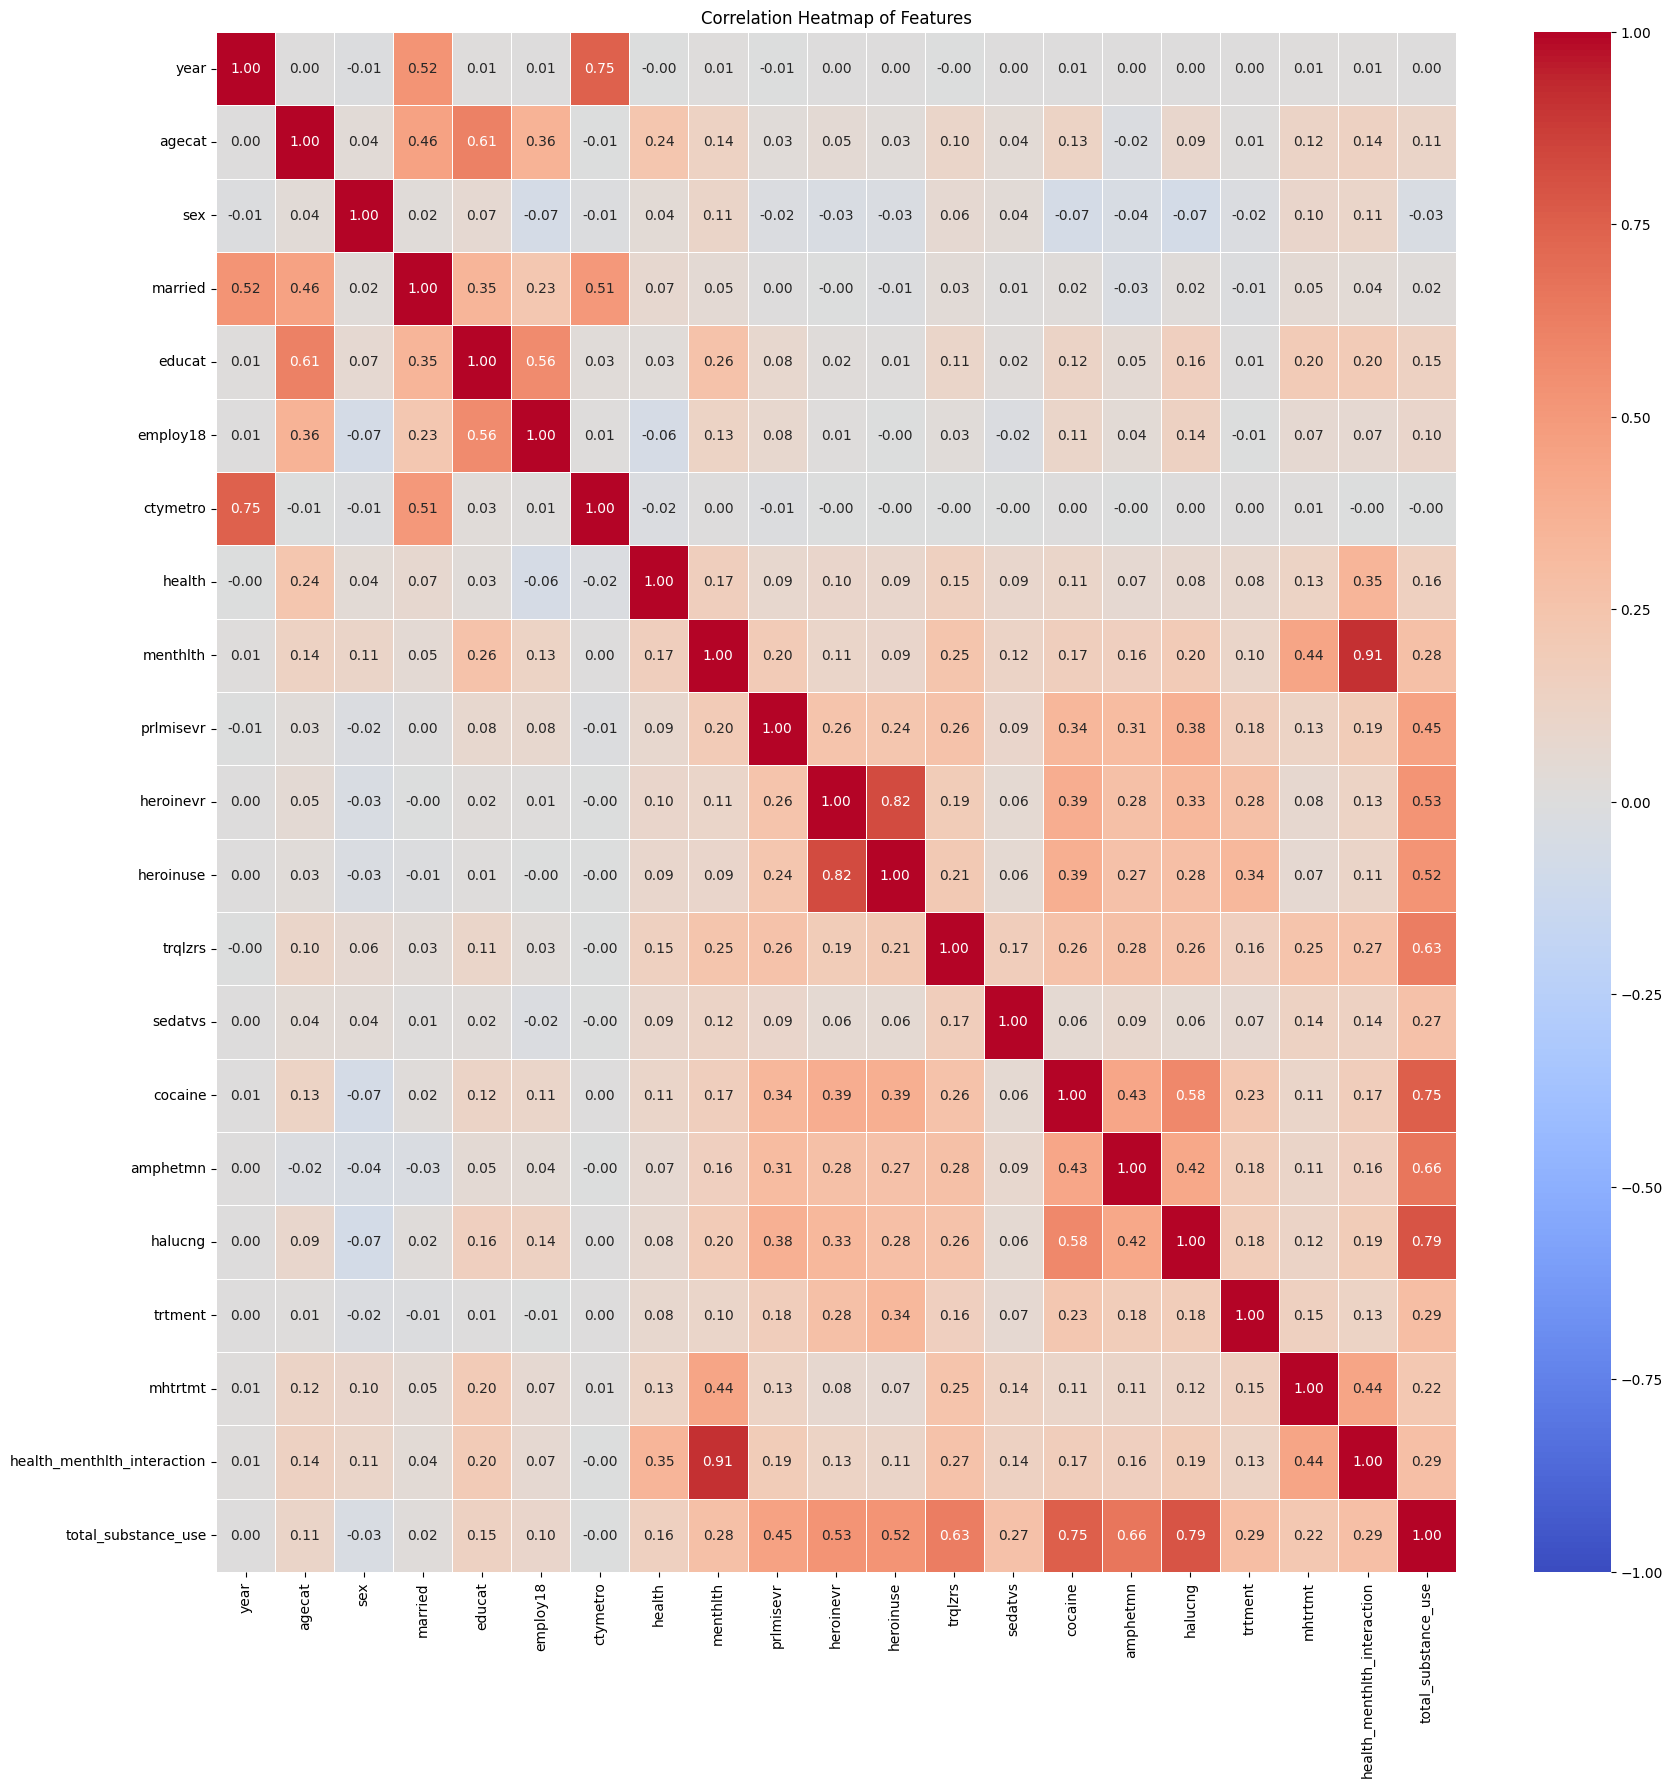

In [58]:
figure = plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, linewidths=.5)
plt.title('Correlation Heatmap of Features')
plt.savefig('Correlation Heatmap of Features.png')
plt.show()

In [59]:
corr_matrix['prlmisevr']

,prlmisevr
year,-0.007442
agecat,0.026110
sex,-0.023388
married,0.003617
educat,0.084066
employ18,0.079131
ctymetro,-0.010608
health,0.085053
menthlth,0.200511
prlmisevr,1.000000


In [60]:
corr_matrix['prlmisevr'].sort_values(ascending=False)[1:4].reset_index()

,index,prlmisevr
0,total_substance_use,0.454297
1,halucng,0.381585
2,cocaine,0.341974


In [61]:
df_corr = corr_matrix['prlmisevr'].sort_values(ascending=False)[1:].reset_index()


<ipython-input-62-febdb00e8e0a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='index', y='prlmisevr', data=df_corr, palette='coolwarm')


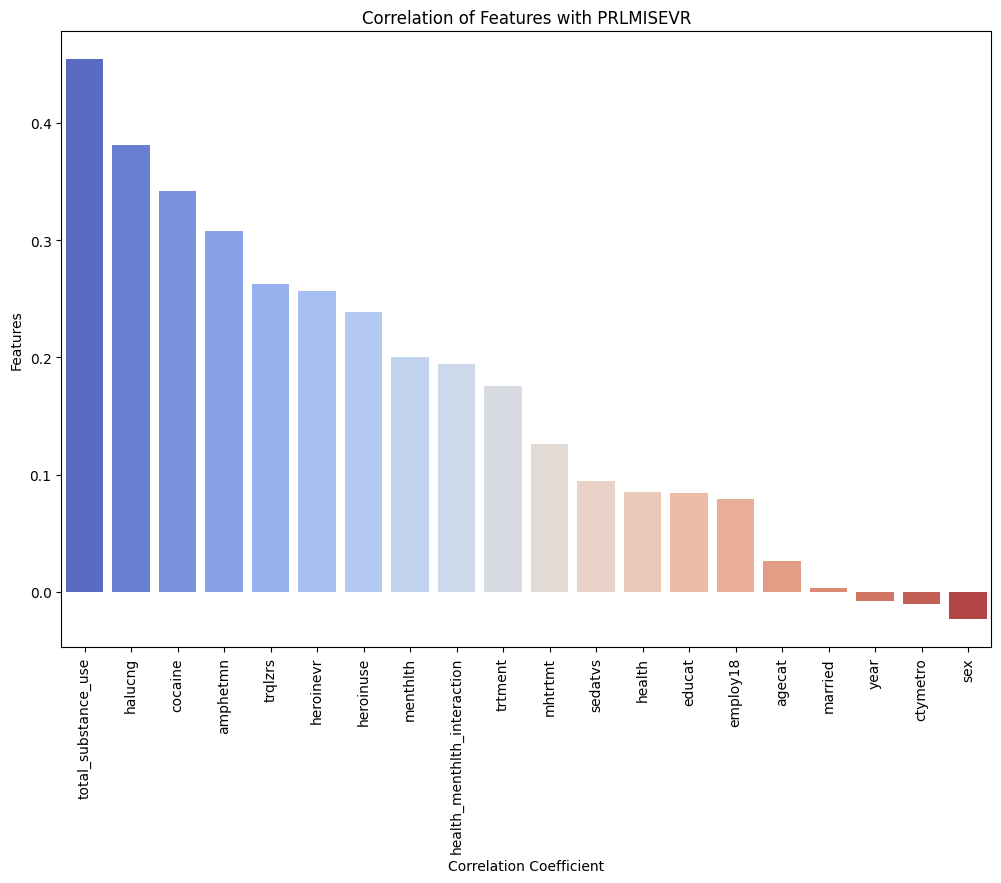

In [62]:
df_corr = df_corr.sort_values(by='prlmisevr', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='index', y='prlmisevr', data=df_corr, palette='coolwarm')
plt.title('Correlation of Features with PRLMISEVR')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
x_ticks = plt.xticks(rotation=90)
plt.savefig('Correlation of Features with PRLMISEVR.png')
plt.show()

In [63]:
summary = df[['halucng', 'cocaine', 'amphetmn']].describe()
print(summary)

             halucng        cocaine       amphetmn
count  170317.000000  170317.000000  170317.000000
mean        0.327947       0.179459       0.153825
std         0.869154       0.561877       0.500246
min         0.000000       0.000000       0.000000
25%         0.000000       0.000000       0.000000
50%         0.000000       0.000000       0.000000
75%         0.000000       0.000000       0.000000
max         5.000000       5.000000       5.000000


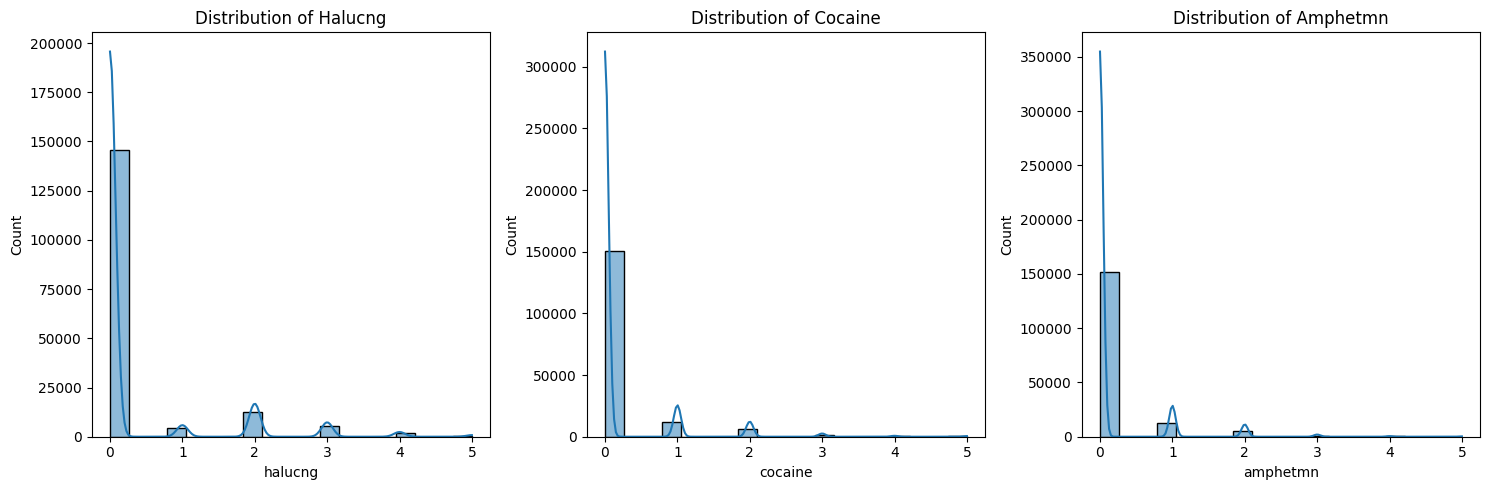

In [64]:
# Distribution Plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['halucng'], kde=True)
plt.title('Distribution of Halucng')

plt.subplot(1, 3, 2)
sns.histplot(df['cocaine'], kde=True)
plt.title('Distribution of Cocaine')

plt.subplot(1, 3, 3)
sns.histplot(df['amphetmn'], kde=True)
plt.title('Distribution of Amphetmn')

plt.tight_layout()
plt.show()

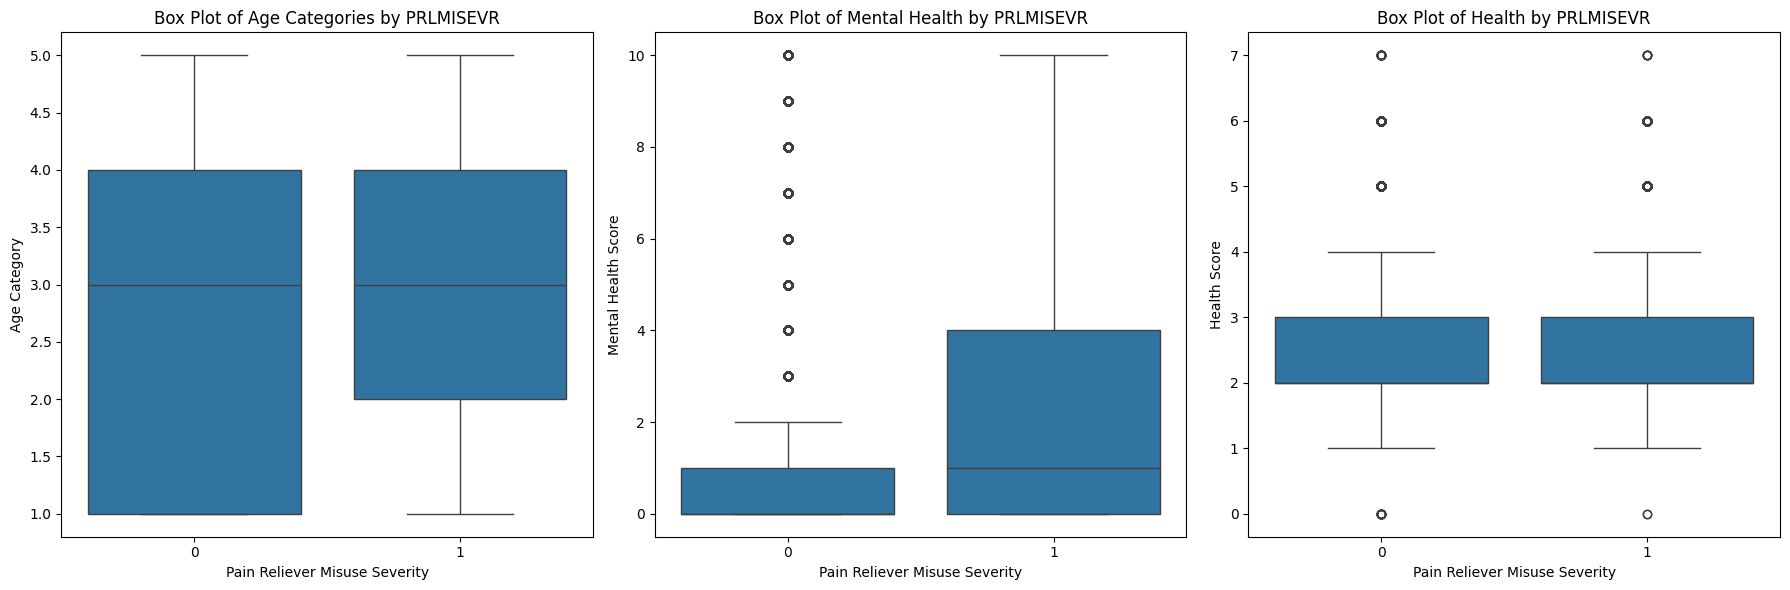

In [65]:

plt.figure(figsize=(18, 6))

# Box plot for 'agecat'
plt.subplot(1, 3, 1)
sns.boxplot(x='prlmisevr', y='agecat', data=df)
plt.title('Box Plot of Age Categories by PRLMISEVR')
plt.xlabel('Pain Reliever Misuse Severity')
plt.ylabel('Age Category')

# Box plot for 'menthlth'
plt.subplot(1, 3, 2)
sns.boxplot(x='prlmisevr', y='menthlth', data=df)
plt.title('Box Plot of Mental Health by PRLMISEVR')
plt.xlabel('Pain Reliever Misuse Severity')
plt.ylabel('Mental Health Score')

# Box plot for 'health'
plt.subplot(1, 3, 3)
sns.boxplot(x='prlmisevr', y='health', data=df)
plt.title('Box Plot of Health by PRLMISEVR')
plt.xlabel('Pain Reliever Misuse Severity')
plt.ylabel('Health Score')

# Display the plots
plt.tight_layout()
plt.savefig('box_plots.png')
plt.show()

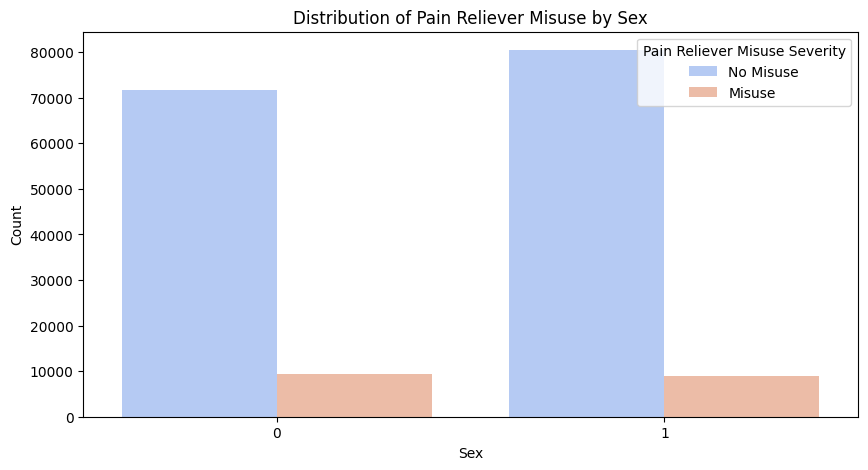

In [66]:
# Bar plot for 'sex'
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='sex', hue='prlmisevr', palette='coolwarm')
plt.title('Distribution of Pain Reliever Misuse by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Pain Reliever Misuse Severity', loc='upper right', labels=['No Misuse', 'Misuse'])
plt.savefig('distribution_of_pain_reliever_misuse_by_sex.png')
plt.show()

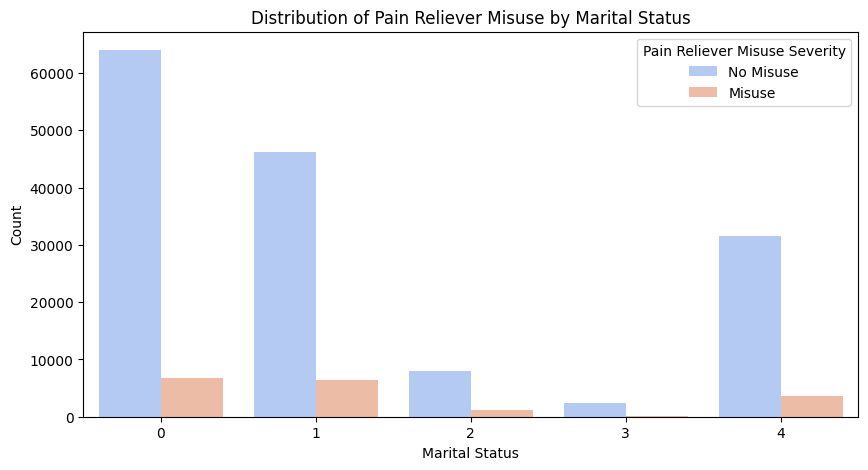

In [67]:
# Bar plot for 'married'
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='married', hue='prlmisevr', palette='coolwarm')
plt.title('Distribution of Pain Reliever Misuse by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Pain Reliever Misuse Severity', loc='upper right', labels=['No Misuse', 'Misuse'])
plt.savefig('distribution_of_pain_reliever_misuse_by_marital_status.png')
plt.show()


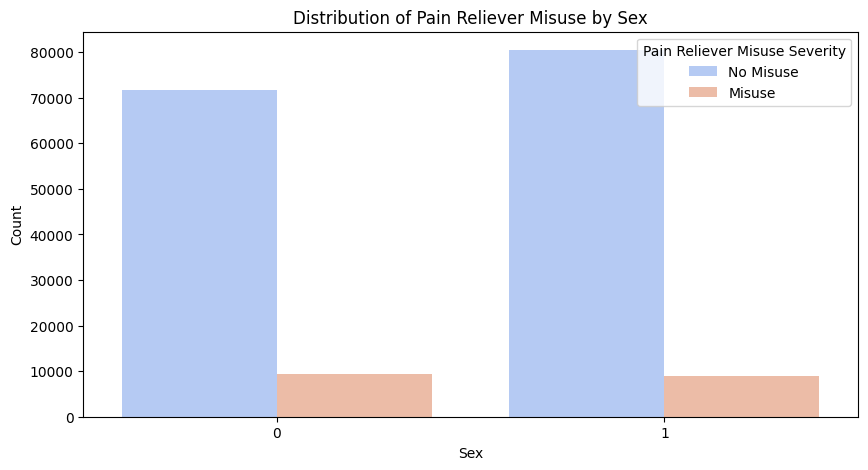

In [68]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='sex', hue='prlmisevr', palette='coolwarm')
plt.title('Distribution of Pain Reliever Misuse by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Pain Reliever Misuse Severity', loc='upper right', labels=['No Misuse', 'Misuse'])
plt.savefig('distribution_of_pain_reliever_misuse_by_sex.png')
plt.show()

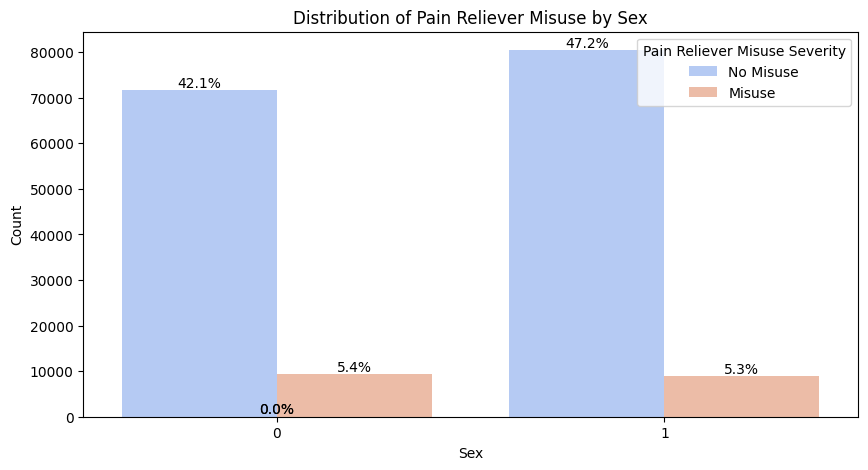

In [69]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='sex', hue='prlmisevr', palette='coolwarm')
plt.title('Distribution of Pain Reliever Misuse by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Pain Reliever Misuse Severity', loc='upper right', labels=['No Misuse', 'Misuse'])

# Add percentage labels on top of each bar
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

# Save the plot
plt.savefig('distribution_of_pain_reliever_misuse_by_sex.png')
plt.show()

In [70]:
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['prlmisevr'])
y = df['prlmisevr']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2022)

In [71]:
smote = SMOTE(random_state=2022)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [74]:
models = {
    'lr': LogisticRegression(max_iter=1000),
    'rfc': RandomForestClassifier(),
    ##'knn': KNeighborsClassifier(),
    ##'dtc': DecisionTreeClassifier()
}

for name, model in models.items():
    pipe = pipeline([
        ('sc', StandardScaler()),
        ('pc' , PCA(n_components= 5)),
        (name, model)
    ])
    pipe.fit(X_train, y_train)
    score = pipe.score(X_test, y_test)
    print(f"{name} accuracy: {score:.4f}")


lr accuracy: 0.8182
rfc accuracy: 0.8064


In [75]:
features = df.drop('prlmisevr', axis=1)
target = df['prlmisevr']

# Preprocessing: Encoding categorical variables and scaling numerical ones
categorical_features = features.select_dtypes(include=['object']).columns
numerical_features = features.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Apply the preprocessor to the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Define the model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Predict and analyze results
y_pred = (model.predict(X_test) > 0.5).astype("int32")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
3407/3407 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8987 - loss: 0.2850 - val_accuracy: 0.9025 - val_loss: 0.2653
Epoch 2/100
3407/3407 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9067 - loss: 0.2640 - val_accuracy: 0.9020 - val_loss: 0.2671
Epoch 3/100
3407/3407 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9070 - loss: 0.2609 - val_accuracy: 0.9027 - val_loss: 0.2650
Epoch 4/100
3407/3407 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9063 - loss: 0.2641 - val_accuracy: 0.9004 - val_loss: 0.2660
Epoch 5/100
3407/3407 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9061 - loss: 0.2617 - val_accuracy: 0.9027 - val_loss: 0.2651
Epoch 6/100
3407/3407 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9074 - loss: 0.2620 - val_accuracy: 0.9030 - val_loss: 0.2647
Epoch 7/100
3407/3407 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9072 - loss: 0.2625 - val_accuracy: 0.9031 - val_loss: 0.2644
Epoch 8/100
3407/3407 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9058 -

In [76]:
models = {
    'lr': LogisticRegression(max_iter=1000),
    'rfc': RandomForestClassifier(),
    'knn': KNeighborsClassifier(),
    'svc': SVC(),
    'dtc': DecisionTreeClassifier()
}

for name, model in models.items():
    pipe = pipeline([
        ('sc', StandardScaler()),
        ('pc' , PCA(n_components= 5)),
        (name, model)
    ])
    pipe.fit(X_train, y_train)
    score = pipe.score(X_test, y_test)
    print(f"{name} accuracy: {score:.4f}")


lr accuracy: 0.9089
rfc accuracy: 0.9019
knn accuracy: 0.8984
svc accuracy: 0.9089
dtc accuracy: 0.8785
